In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hyclib as lib

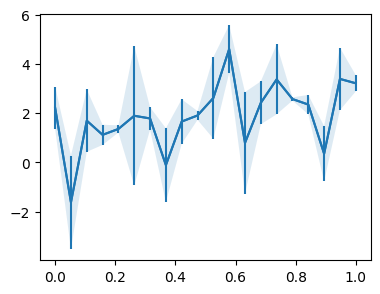

In [13]:
x = np.linspace(0, 1, 20)
yerr = np.abs(np.random.normal(size=len(x)))
m, b = 2, 1
y = np.random.normal(loc=m * x + b, scale=yerr)

lib.plot.errorbar(x, y, yerr=yerr)
plt.errorbar(x, y, yerr=yerr)
plt.show()

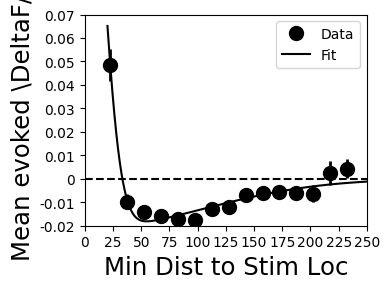

In [11]:
fig, axes = lib.plot.plot_matlab_fig('data/test_figures/fig2.fig')

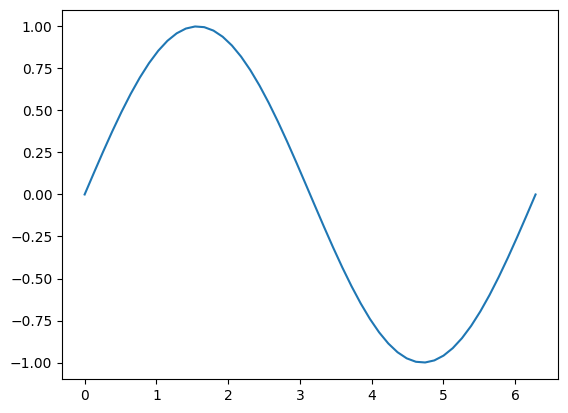

In [9]:
x = np.linspace(0,2*np.pi)
fig, axes = lib.plot.subplots(1, 1, keep_shape=True)
axes = axes.reshape(-1)
axes[0].plot(x, np.sin(x))
plt.show()

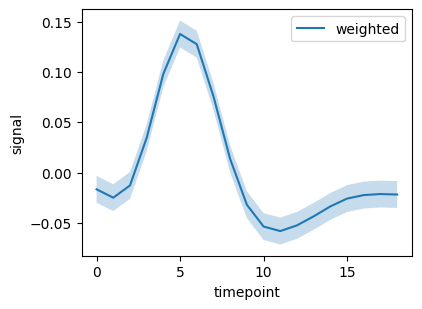

In [22]:
df = sns.load_dataset('fmri')
df['signal_err'] = np.abs(np.ones(len(df['signal'])))*0.1
# sns.lineplot(df, x='timepoint', y='signal', errorbar='se')
# lib.plot.lineplot(df, x='timepoint', y='signal', label='not weighted', plot_kwargs={'ls': '--'})
# lib.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=False, label='not weighted')
l = lib.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=True, label='weighted')
plt.legend()
plt.show()
# lib.plot.extract_data(l)

In [23]:
lib.pd.display(df)

,subject,timepoint,event,region,signal,signal_err
0,s13,18,stim,parietal,-0.0176,0.1000
1,s5,14,stim,parietal,-0.0809,0.1000
2,s12,18,stim,parietal,-0.0810,0.1000
...,...,...,...,...,...,...
1061,s12,7,cue,frontal,-0.0049,0.1000
1062,s11,7,cue,frontal,-0.0254,0.1000
1063,s0,0,cue,parietal,-0.0069,0.1000


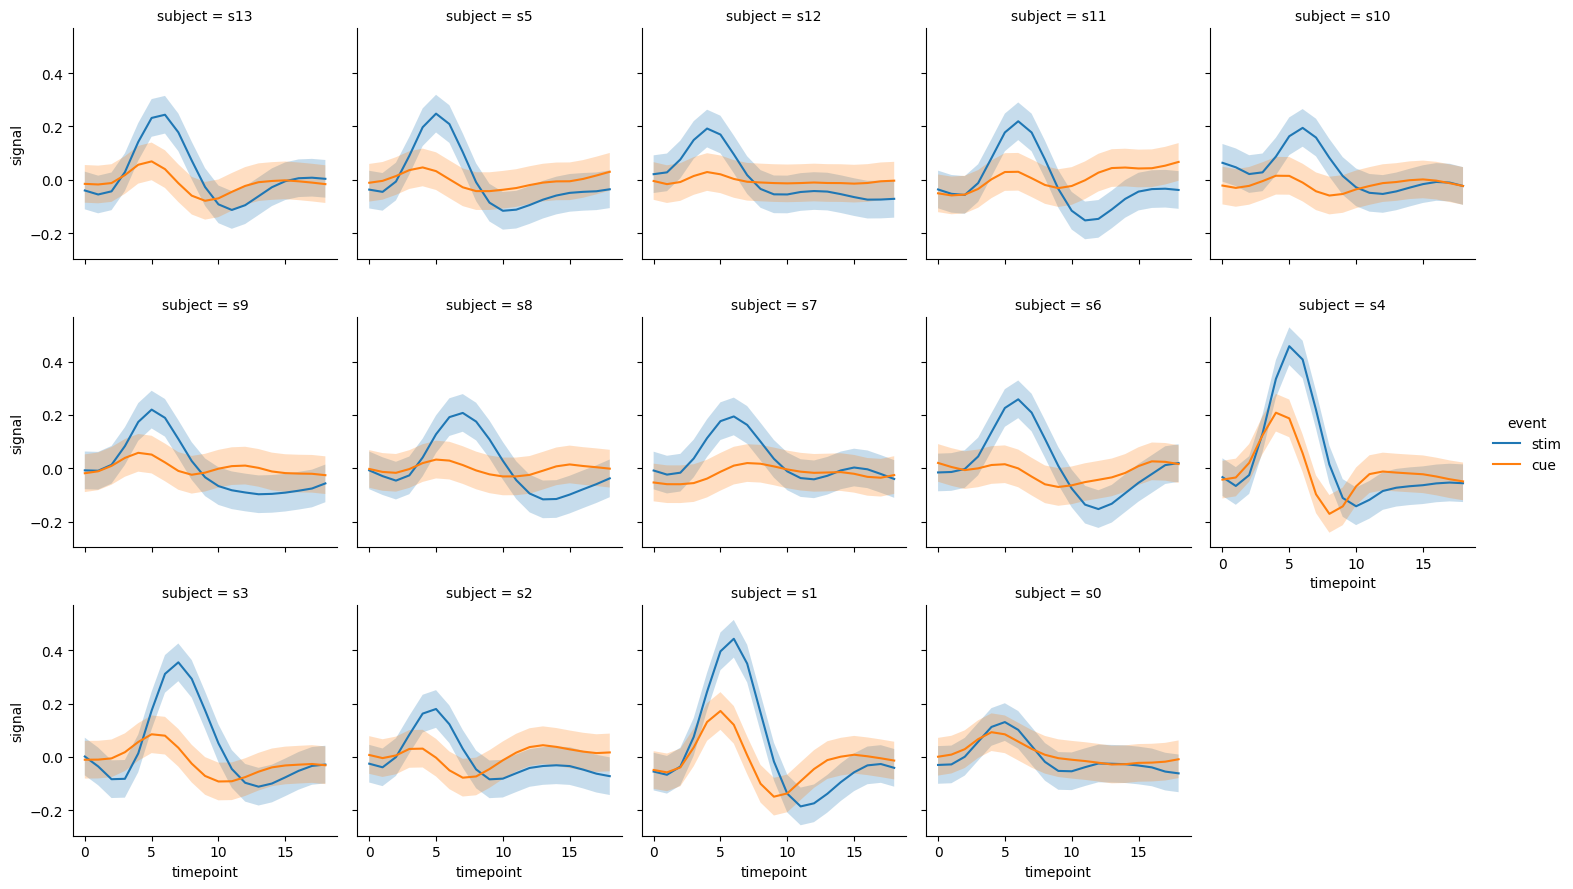

In [30]:
df = sns.load_dataset('fmri')
df['signal_err'] = np.abs(np.ones(len(df['signal'])))*0.1
g = sns.FacetGrid(df, hue='event', col='subject', col_wrap=5)
g.map_dataframe(lib.plot.lineplot, x='timepoint', y='signal', yerr='signal_err', weighted=True)
g.add_legend()
plt.show()
# lib.plot.extract_data(l)

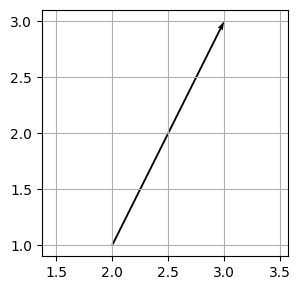

In [8]:
lib.plot.vec([1,2], origin=[2,1])
lib.plot.set_aspect('equal_square')
plt.grid(which='both')
plt.show()

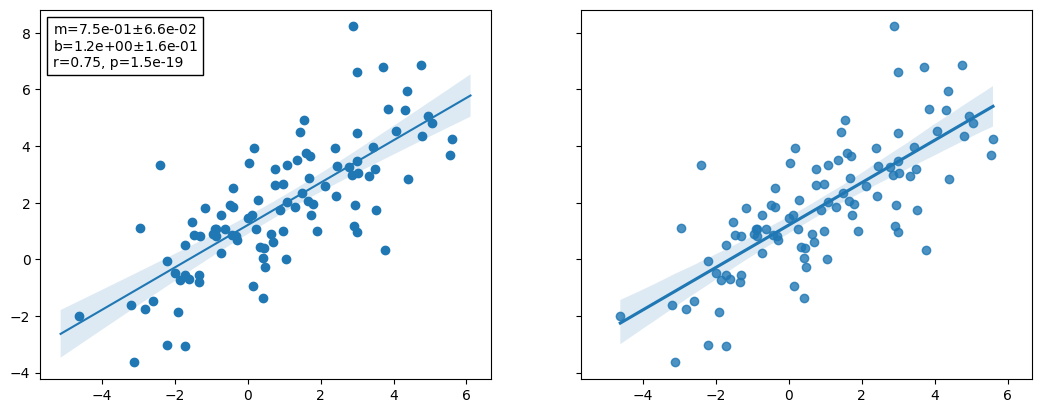

In [4]:
mean = np.array([1,2])
U = 1/(2**0.5)*np.array([[1,-1],[1,1]])
S = np.diag(np.array([3,1]))**2
cov = U @ S @ U.T
x = np.random.multivariate_normal(mean,cov,size=100)

fig, axes = lib.plot.subplots(1, 2, sharex=True, sharey=True)

lib.plot.regplot(x[:,0], x[:,1], text_kwargs={'loc': 'upper left'}, ax=axes[0])

sns.regplot(x=x[:,0], y=x[:,1], ax=axes[1])

plt.show()

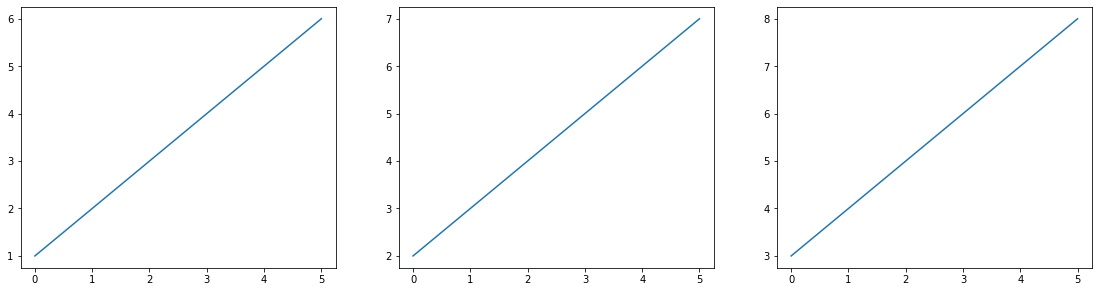

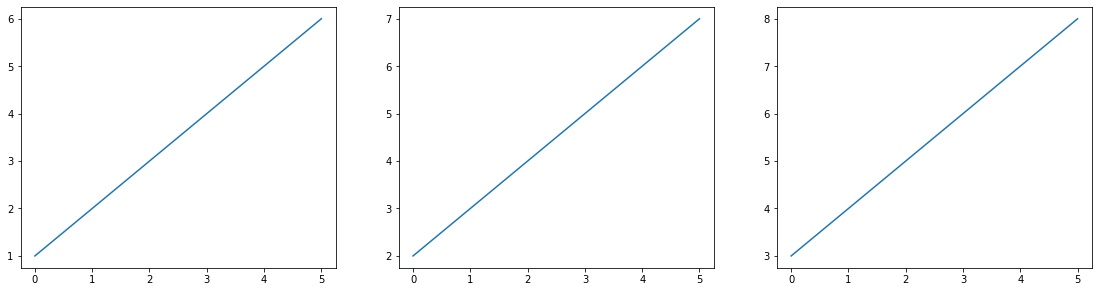

In [10]:
fig, axes = lib.plot.subplots(1,3,keep_shape=True)
x, y = np.linspace(0,5), np.linspace(1,6)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].plot(x, y+j)
plt.show()

fig, axes = lib.plot.subplots(1,3,keep_shape=False)
x, y = np.linspace(0,5), np.linspace(1,6)
for j in range(axes.shape[0]):
    axes[j].plot(x, y+j)
plt.show()

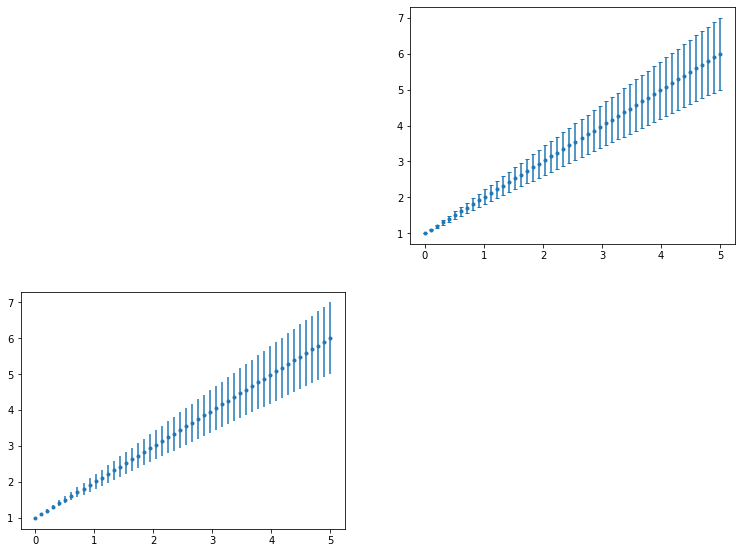

In [61]:
fig, axes = lib.plot.subplots(2,2)
x, y, yerr = np.linspace(0,5), np.linspace(1,6), np.linspace(0,1)
lib.plot.scaterr(x, y, yerr, ax=axes[0,1], cap=True)
lib.plot.scaterr(x, y, yerr, ax=axes[1,0])
lib.plot.hide_unused_axes(axes)
plt.show()